In [101]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [102]:
def load_results(gal_type):
    # load saved arrays from coadding
    path = f"/Users/aizaali/Desktop/desi_data/coadd_results/{gal_type}_loa_skyfiber_coadd_results.npz"
    results = np.load(path)

    wavelength = results['wavelength']
    valid_bins = results['valid_bins']
    noise = results['noise_broad']
    snr_broad = results['snr_broad']

    valid_wave = wavelength[valid_bins]
    valid_noise = noise[valid_bins]
    valid_snr_broad = snr_broad[valid_bins]

    return valid_wave,5*valid_noise

In [103]:
def calculate_e_dm(redshift,sb_limit,sigma_R):
    denom = sigma_R 
    new_limit = sb_limit* 4.24 * 10**10 #arcsec to steradian
    num = 4*new_limit*np.pi*((1+redshift)**4)
    return num/denom

In [104]:
def calculate_gamma(emissivity):
    # speed of light in cm/s
    c = 3*10**10
    return emissivity/ (c**2)

In [105]:
def calculate_g(mass, gamma):
    num = gamma*64*np.pi
    denom = mass**3
    return mass, np.sqrt(num/denom)

In [106]:
def calculate_mass_range(wave):
    # mc^2 = 2E --> mc^2 = 2hc/wave --> m = 2h/c*wave (c=1)
    num = 2* (1.23984e-6)
    return (num*1e10) / (wave)

In [107]:
def main():
    # avg redshift of each dataset
    z_BGS = 0.2516
    z_LRG = 0.6851
    # note : delta_sigma (R) = sigma(R)
    # surface mass density
    # in paper R_BGS = 40 kpc
    # in paper R_LRG = 70 kpc
    # in paper sigma_R_BGS --> 70 hM_s / pc^2
    # in paper sigma_R_LRG --> 145 hM_s / pc^2
######################################################

    # values for sigma_R (paper values for now)
    sigma_R_BGS = .011
    print(f"BGS ΣR:{sigma_R_BGS}")
    sigma_R_LRG = .021
    print(f"LRG ΣR:{sigma_R_LRG}")

    # calculate e_dm (set surface brightness to one value)
    e_dm_BGS = calculate_e_dm(z_BGS,10**-19,sigma_R_BGS)
    e_dm_LRG = calculate_e_dm(z_LRG,10**-19,sigma_R_LRG)
    print(f"BGS ϵ_DM:{e_dm_BGS}")
    print(f"LRG ϵ_DM:{e_dm_LRG}")

    # calculate e_dm (use arrays)

    LRG_wave, LRG_5sigma = load_results("LRG") # load 5*noise array
    BGS_wave, BGS_5sigma = load_results("BGS") # load 5*noise array

    e_dm_array_BGS = calculate_e_dm(z_BGS,BGS_5sigma,sigma_R_BGS)
    e_dm_array_LRG = calculate_e_dm(z_LRG,LRG_5sigma,sigma_R_LRG)

    # calculate gamma
    
    gamma_BGS = calculate_gamma(e_dm_BGS)
    gamma_LRG = calculate_gamma(e_dm_LRG)
    print(f"BGS Γ:{gamma_BGS}") #ergs*s/g/m^2
    print(f"LRG Γ:{gamma_LRG}") #ergs*s/g/m^2

    mass_BGS = calculate_mass_range(BGS_wave)
    mass_LRG = calculate_mass_range(LRG_wave)
    
    gamma_array_BGS = calculate_gamma(e_dm_array_BGS)
    gamma_array_LRG = calculate_gamma(e_dm_array_LRG)
    
    plt.figure(figsize=(10, 4))
    plt.plot(mass_BGS, gamma_array_BGS, label = "BGS")
    plt.plot(mass_LRG, gamma_array_LRG, label = "LRG")
    plt.xlabel("m [ev]")
    plt.ylabel(r'Γ [$s^{-1}$]')
    plt.legend()
    plt.title("Γ vs m")


BGS ΣR:0.011
LRG ΣR:0.021
BGS ϵ_DM:1.1886260754608148e-05
LRG ϵ_DM:2.0457809973729073e-05
BGS Γ:1.3206956394009055e-26
LRG Γ:2.2730899970810082e-26


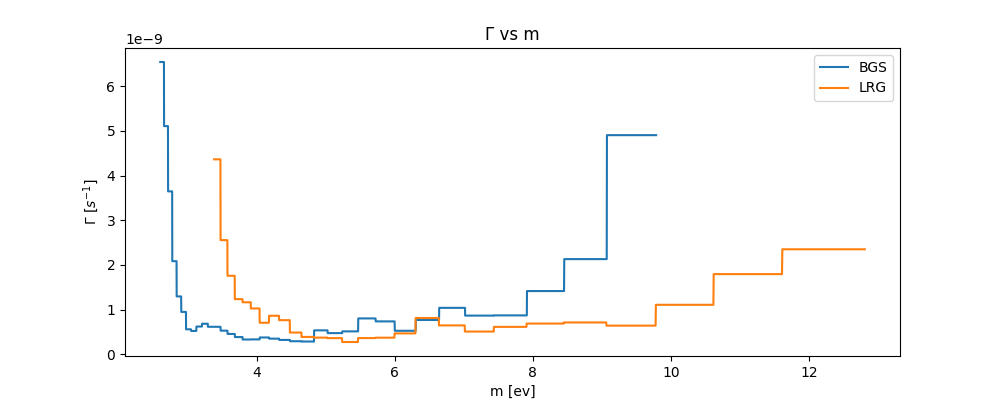

In [108]:
main()